<a href="https://colab.research.google.com/github/Aswin-Kumar66/ml-practise/blob/main/Binary_Classification_of_Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()


Saving train.csv to train (2).csv


In [5]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
print(len(train[train['Machine failure'] == 0]))
print(len(train[train['Machine failure'] == 1]))

134281
2148


<ipython-input-9-e8859442f805>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


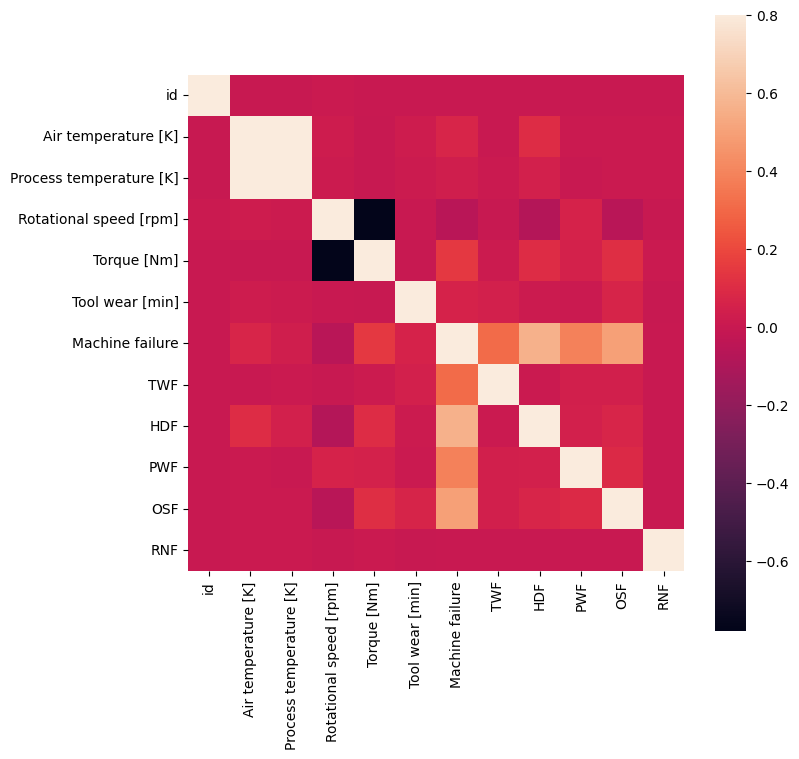

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = train.corr()
fig = plt.figure(figsize = (8, 8))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
train['Air/Process'] = train['Air temperature [K]']/train['Process temperature [K]']
train['Torque*Rotation'] = train['Torque [Nm]']*train['Rotational speed [rpm]']
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Air/Process,Torque*Rotation
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0.970930,57615.6
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0.969561,51186.9
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0.970178,47832.5
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0.968157,67513.2
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0.964401,58091.4


<ipython-input-11-59f30297b06b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


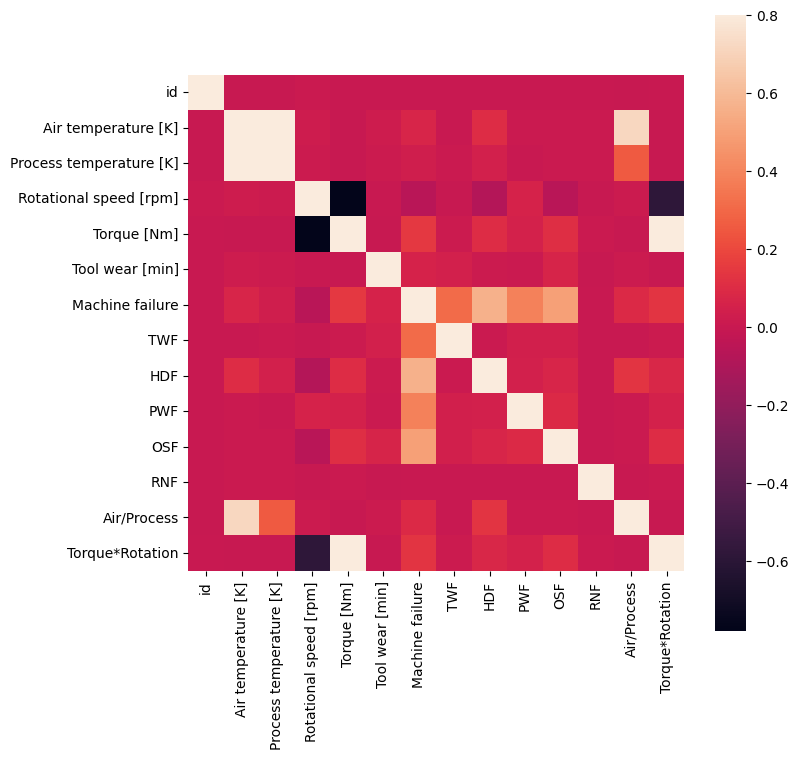

In [11]:
corrmat = train.corr()
fig = plt.figure(figsize = (8, 8))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:

train = train.drop(['id' , 'Product ID'] , axis = 1)


<ipython-input-13-d753591a2e32>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train['Air/Process']))


Axes(0.125,0.11;0.775x0.77)


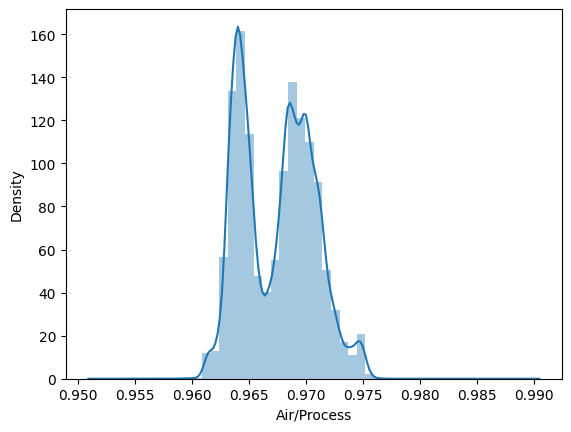

In [13]:
print(sns.distplot(train['Air/Process']))

<ipython-input-56-8b61f3f414ee>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train['Torque*Rotation']))


Axes(0.125,0.11;0.775x0.77)


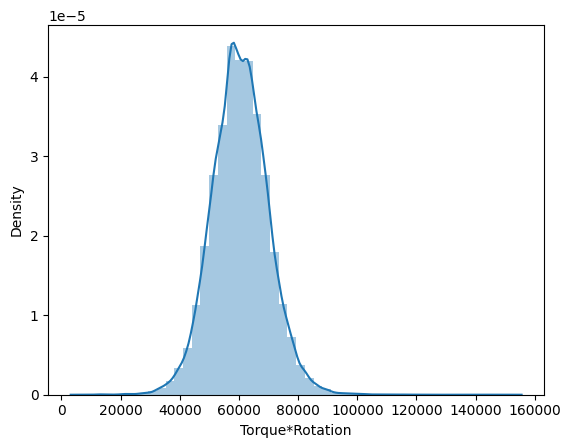

In [56]:
# for i in train.columns :
#   if(i != 'Type') :

print(sns.distplot(train['Torque*Rotation']))

<ipython-input-60-bedeb655b188>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(train['Tool wear [min]']))


Axes(0.125,0.11;0.775x0.77)


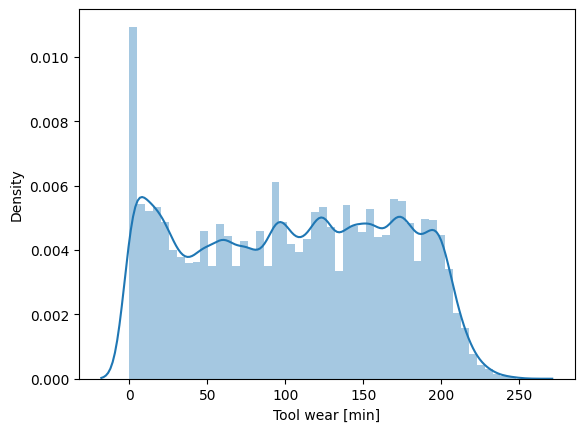

In [60]:
import numpy as np

print(sns.distplot(train['Tool wear [min]']))

In [14]:
train = train.drop(['Air temperature [K]' , 'Process temperature [K]' , 'Torque [Nm]' , 'Rotational speed [rpm]'] , axis = 1)

In [15]:
train = pd.get_dummies(train)

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['Torque*Rotation'] = scaler.fit_transform(train[['Torque*Rotation']])
train['Tool wear [min]'] = scaler.fit_transform(train[['Tool wear [min]']])



In [48]:
train.head()

,Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Air/Process,Torque*Rotation,Type_H,Type_L,Type_M
0,0.553360,0,0,0,0,0,0,0.970930,0.352222,0,1,0
1,0.790514,0,0,0,0,0,0,0.969561,0.308497,0,0,1
2,0.098814,0,0,0,0,0,0,0.970178,0.285682,0,1,0
3,0.778656,0,0,0,0,0,0,0.968157,0.419540,0,1,0
4,0.134387,0,0,0,0,0,0,0.964401,0.355458,0,0,1


In [49]:
train_0 = train[train['Machine failure'] == 0]
train_1 = train[train['Machine failure'] == 1]
print(len(train_0))
print(len(train_1))

134281
2148


Undersampling

In [50]:
train_0_undersample = train_0.sample(2148)
train_undersample = pd.concat([train_0_undersample , train_1] , axis = 0)
len(train_undersample)


4296

In [51]:

X_undersample = train_undersample.drop('Machine failure' , axis = 1)
Y_undersample = train_undersample['Machine failure']

In [52]:
X_undersample.describe()

,Tool wear [min],TWF,HDF,PWF,OSF,RNF,Air/Process,Torque*Rotation,Type_H,Type_L,Type_M
count,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000,4296.00000,4296.000000,4296.000000
mean,0.470916,0.049348,0.162477,0.075419,0.124767,0.002793,0.968519,0.404261,0.05284,0.726955,0.220205
std,0.276678,0.216619,0.368931,0.264097,0.330493,0.052784,0.003739,0.093024,0.22374,0.445575,0.414433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.953757,0.004456,0.00000,0.000000,0.000000
25%,0.233202,0.000000,0.000000,0.000000,0.000000,0.000000,0.964724,0.347986,0.00000,0.000000,0.000000
50%,0.490119,0.000000,0.000000,0.000000,0.000000,0.000000,0.968790,0.403537,0.00000,1.000000,0.000000
75%,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.971504,0.462245,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977713,0.963145,1.00000,1.000000,1.000000


In [63]:
from sklearn.model_selection import train_test_split

X_train_under , X_test_under , Y_train_under , Y_test_under = train_test_split(X_undersample , Y_undersample , test_size = 0.2 , random_state = 15 , stratify = Y_undersample)
Y_train_under.value_counts()

0    1718
1    1718
Name: Machine failure, dtype: int64

In [64]:
X_train_under.shape

(3436, 11)

Oversampling

In [65]:
train_1_oversample = train_1.sample(134281 , replace = True)
train_oversample = pd.concat([train_0 , train_1_oversample] , axis = 0)
len(train_oversample)

268562

In [66]:

X_oversample = train_oversample.drop('Machine failure' , axis = 1)
Y_oversample = train_oversample['Machine failure']

In [68]:
X_oversample.describe()

,Tool wear [min],TWF,HDF,PWF,OSF,RNF,Air/Process,Torque*Rotation,Type_H,Type_L,Type_M
count,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000,268562.000000
mean,0.468415,0.049463,0.162119,0.075644,0.124500,0.002443,0.968540,0.403662,0.060507,0.719864,0.219629
std,0.277561,0.216834,0.368561,0.264428,0.330152,0.049363,0.003742,0.093625,0.238425,0.449067,0.413996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.951830,0.000000,0.000000,0.000000,0.000000
25%,0.233202,0.000000,0.000000,0.000000,0.000000,0.000000,0.964782,0.347131,0.000000,0.000000,0.000000
50%,0.486166,0.000000,0.000000,0.000000,0.000000,0.000000,0.968791,0.402454,0.000000,1.000000,0.000000
75%,0.723320,0.000000,0.000000,0.000000,0.000000,0.000000,0.971511,0.462284,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.989566,1.000000,1.000000,1.000000,1.000000


In [67]:
X_train_over , X_test_over , Y_train_over , Y_test_over = train_test_split(X_oversample , Y_oversample , test_size = 0.2 , random_state = 15 , stratify = Y_oversample)
Y_train_over.value_counts()

1    107425
0    107424
Name: Machine failure, dtype: int64

SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

X = train.drop('Machine failure' , axis = 1)
Y = train['Machine failure']

X = pd.get_dummies(X)

sm = SMOTE(sampling_strategy= 'minority')
X_sm , Y_sm = sm.fit_resample(X,Y)
Y_sm.value_counts()

0    134281
1    134281
Name: Machine failure, dtype: int64

In [59]:
X_train_sm , X_test_sm , Y_train_sm , Y_test_sm = train_test_split(X_sm , Y_sm , test_size = 0.2 , random_state = 15 , stratify = Y_sm)
Y_train_sm.value_counts()

1    107425
0    107424
Name: Machine failure, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report


log = LogisticRegression()
dectree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 100)
svm = SVC()

models = [log , dectree , rf]

print('Undersampling')

for model in models :
  print(model)
  model.fit(X_train_under , Y_train_under)
  y_pred = model.predict(X_test_under)
  print(classification_report(y_pred , Y_test_under))



Undersampling
LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       528
           1       0.77      1.00      0.87       332

    accuracy                           0.89       860
   macro avg       0.89      0.91      0.88       860
weighted avg       0.91      0.89      0.89       860

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       402
           1       0.87      0.82      0.84       458

    accuracy                           0.84       860
   macro avg       0.84      0.84      0.84       860
weighted avg       0.84      0.84      0.84       860

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       461
           1       0.86      0.92      0.89       399

    accuracy                           0.89       860
   macro avg       0.89      0.90      0.89

**OVERSAMPLING**

In [61]:

for model in models :
  print(model)
  model.fit(X_train_over , Y_train_over)
  y_pred = model.predict(X_test_over)
  print(classification_report(y_pred , Y_test_over))



LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.82      0.90     32616
           1       0.78      0.99      0.87     21097

    accuracy                           0.89     53713
   macro avg       0.89      0.91      0.89     53713
weighted avg       0.91      0.89      0.89     53713

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26730
           1       1.00      1.00      1.00     26983

    accuracy                           1.00     53713
   macro avg       1.00      1.00      1.00     53713
weighted avg       1.00      1.00      1.00     53713

RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26832
           1       1.00      1.00      1.00     26881

    accuracy                           1.00     53713
   macro avg       1.00      1.00      1.00     53713
weighted avg       1.00 

**SMOTE**

In [70]:

for model in models :
  print(model)
  model.fit(X_train_sm , Y_train_sm)
  y_pred = model.predict(X_test_sm)
  print(classification_report(y_pred , Y_test_sm))



LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.82      0.90     32538
           1       0.78      0.99      0.88     21175

    accuracy                           0.89     53713
   macro avg       0.89      0.91      0.89     53713
weighted avg       0.91      0.89      0.89     53713

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26857
           1       0.97      0.97      0.97     26856

    accuracy                           0.97     53713
   macro avg       0.97      0.97      0.97     53713
weighted avg       0.97      0.97      0.97     53713

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27375
           1       0.97      0.98      0.97     26338

    accuracy                           0.98     53713
   macro avg       0.98      0.98      0.98     53713
weighted avg       0.98 

In [71]:
import tensorflow as tf
from tensorflow import keras

model =  keras.Sequential([
    keras.layers.Dense(units = 20 , input_shape = (11,) , activation = 'relu'),
    keras.layers.Dense(units = 20  ,activation = 'relu'),
    keras.layers.Dense(units = 1 ,  activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.fit(X_train_sm , Y_train_sm, epochs = 3  )

Epoch 1/3
6715/6715 [==============================] - 13s 2ms/step - loss: 0.2735 - accuracy: 0.8899
Epoch 2/3
6715/6715 [==============================] - 14s 2ms/step - loss: 0.2558 - accuracy: 0.8983
Epoch 3/3
6715/6715 [==============================] - 13s 2ms/step - loss: 0.2534 - accuracy: 0.8986


In [44]:
uploaded1 = files.upload()

Saving test.csv to test.csv


In [45]:
test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [72]:
test['Air/Process'] = test['Air temperature [K]']/test['Process temperature [K]']
test['Torque*Rotation'] = test['Torque [Nm]']*test['Rotational speed [rpm]']
ids = test['id']
test = test.drop(['id' , 'Product ID'] , axis = 1)
test = test.drop(['Air temperature [K]' , 'Process temperature [K]' , 'Torque [Nm]' , 'Rotational speed [rpm]'] , axis = 1)
test = pd.get_dummies(test)
test['Torque*Rotation'] = scaler.fit_transform(test[['Torque*Rotation']])
test.head()

KeyError: ignored

In [74]:
test['Tool wear [min]'] = scaler.fit_transform(test[['Tool wear [min]']])
test.head()

,Tool wear [min],TWF,HDF,PWF,OSF,RNF,Air/Process,Torque*Rotation,Type_H,Type_L,Type_M
0,0.237154,0,0,0,0,0,0.970465,0.294539,0,1,0
1,0.067194,0,0,0,0,0,0.970096,0.249698,0,1,0
2,0.379447,0,0,0,0,0,0.970683,0.297658,0,1,0
3,0.019763,0,0,0,0,0,0.969315,0.373541,0,0,1
4,0.450593,0,0,0,0,0,0.971502,0.327505,0,0,1


In [93]:
model = rf
model.fit(X_train_over , Y_train_over)

RandomForestClassifier()

In [94]:
y_pred = model.predict(test)

In [102]:
y_ann = []
for i in y_pred :
  if(i <= 0.5) :
    y_ann.append(0)
  else :
    y_ann.append(1)

y_ann = pd.DataFrame(y_ann)



In [103]:
y_ann.value_counts()

0    89802
1     1152
dtype: int64

In [99]:
finaldf = pd.concat([ids , y_ann] , axis = 1)
finaldf.to_csv('finalvalues.csv' , index = False)


In [100]:
files.download('finalvalues.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>